# Final Exam - NYU GA 2600, 2018 #

## Due by email Monday December 17, 5:00 PM ##

### Instructions ###

1. Read carefully the questions so you don't miss things you're asked to do
2. In addition to figures, I will ask you to answer some questions in your own words. Please type them into a cell in the python notebook. 
3. You can talk to each-other about it (remember, you can use the class email list to see if anyone else wants to meet and discuss it too), but please do your own original work. As with all programming exercises, there are really infinite solutions so it will be obvious if you copy each-other, and you won't get credit for that part.
4. Please turn the final exam in on time (meaning, send me the *.ipynb* file). This is a final, so I will remove 25% credit for every 24 hour period it is late, starting at 5:01 on Monday the 17th. Feel free to turn it in early. 
5. Have fun! You should remember that in a week you're doing things faster and better than people could do in one year of their PhD not very long ago in history!

In [1]:
#setup the notebook
%pylab inline
import os
import numpy as np
import matplotlib as mpl
from IPython.display import Image

#the next things will make the default font size bigger
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

mpl.rc('font', **font)

figure_dir = os.path.join(os.getcwd(),"example_figures")

Populating the interactive namespace from numpy and matplotlib


## Problem 1 - Standard Monte Carlo simulations of the 2D ising model (100 pts total) ##
The Ising model is defined by the Hamiltonian 

$ H = \sum_{\langle ij \rangle} -J s_i s_j - h s_i $

The $\langle ij \rangle$ means that only pairs of $i$ and $j$ which are neighbors on a square lattice should be considered. 

Just like in the Ising model homework, we can do a Monte Carlo simulation the "slow" way, where we compute the full energy every time, and we can do it the fast way, where only the difference in energy at every step is computed. 

### Part 1 (30 points) ###
In the next cell, I have written the code for the slow way. In the cell after that, you should write all the code to do it the fast way, and return the same quantities every MC sweep (the energy and the average spin value $\langle s_i \rangle$). Remember, a "sweep" means we do one attempted MC move for every lattice site.

As we saw before, if we set the seed for the random number generator, the same sequence of 'random' numbers will be generated. The cell after your code will see if your code and my code generate the same 'trajectory'. Make sure that cell says that the results agree!

*NOTE*: I am using the rows of the matrix (first index) as `x` and the columns as `y`. If you just do print(configuration), it will be transposed and flipped compared to the usual version of up and down. Use the `print_matrix` function to show the configuration (so, index 0,0 is the bottom left))

In [2]:
def energy_ising_2d(configuration,J,h):
    lattice_dimension = int(configuration.shape[0])
    energy = 0.0
    for i in range(lattice_dimension):
        for j in range(lattice_dimension):
            spin_value = configuration[i][j]
            spin_value_up = configuration[i][(j+1)%lattice_dimension]
            spin_value_down = configuration[i][(j-1)%lattice_dimension]
            spin_value_left = configuration[(i-1)%lattice_dimension][j]
            spin_value_right = configuration[(i+1)%lattice_dimension][j]
            #J is multiplied by 0.5, b/c otherwise we are counting every enery pair 2x
            energy = energy - h*spin_value - 0.5*J*spin_value*(spin_value_up+spin_value_down+spin_value_left+spin_value_right)
    return energy

def print_matrix(configuration):
    #this flips the matrix along both directions
    print(configuration.T[::-1,:])

def metropolis_mc_slow(n_sweeps, lattice_dimension, beta, J, h):
    #lattice dimension is the number of spins in x- and y- 
    #so the total number of spins is lattice_dimension^2
    
    # we can start with a random configuration of size lattice_dimension x lattice_dimension by generating a random list 
    #    of zeros and twos, then subtracting 1
    configuration = 2*np.random.randint(2, size=(lattice_dimension,lattice_dimension)) - 1
    average_spins = []
    energies = []
    configurations = []
    
    n_lattice_sites = lattice_dimension**2
    n_steps = n_sweeps*n_lattice_sites

    current_energy = energy_ising_2d(configuration,J,h)
    
    for step_i in range(n_steps):
        #this computes the average of the spin observable, and saves it after every sweep
        if(step_i%n_lattice_sites==0):
            average_spin = configuration.mean()
            average_spins.append(average_spin)
            energies.append(current_energy)
            configurations.append(configuration)
        
        spin_to_change_x = np.random.randint(lattice_dimension)
        spin_to_change_y = np.random.randint(lattice_dimension)

        # Change configuration[spspin_to_changein_to_change] to it's opposite value (1->-1, -1->1). 
        configuration[spin_to_change_x,spin_to_change_y] *= -1
        
        energy_flip = energy_ising_2d(configuration,J,h)
        
        r = np.random.random()
        #do metropolis test w/ this random nubmer r 
        if r<min(1,np.exp(-beta*(energy_flip-current_energy))):
            current_energy = energy_flip
        else:
            #set spin back the same way you did before
            configuration[spin_to_change_x,spin_to_change_y] *= -1

    
    return energies, average_spins, configurations

In [ ]:
def energy_difference(J, h, spin_value, spin_value_up, spin_value_down, \
                      spin_value_left, spin_value_right):
    #fill in the formula for the energy difference from flipping spin i,
    #which has value si= 1 or -1, with spin values sleft and sright on the left and right, up and down
    dE = 
    return dE

def metropolis_mc_fast(n_sweeps, lattice_dimension, beta, J, h):
    configuration = 2*np.random.randint(2, size=(lattice_dimension,lattice_dimension)) - 1
    average_spins = []
    energies = []
    configurations = []
    
    n_lattice_sites = lattice_dimension**2
    n_steps = n_sweeps*n_lattice_sites
    
    current_energy = energy_ising_2d(configuration,J,h)
    
    for step_i in range(n_steps):
        if(step_i%n_lattice_sites==0):
            average_spin = configuration.mean()
            average_spins.append(average_spin)
            energies.append(current_energy)
            configurations.append(configuration)

        
        spin_to_change_x = np.random.randint(lattice_dimension)
        spin_to_change_y = np.random.randint(lattice_dimension)
        
        spin_value = configuration[spin_to_change_x, spin_to_change_y]
        spin_value_up = 
        spin_value_down = 
        spin_value_left = 
        spin_value_right = 
    
        dE = energy_difference(J, h, spin_value, spin_value_up, spin_value_down, spin_value_left, spin_value_right)
        r = np.random.random()
        # fill in the metropolis critereon, using dE
        if METROPOLIS_RULE:
            #flip the spin
            configuration[spin_to_change_x, spin_to_change_y]*=-1
            # update the energy
            current_energy += dE
        else:
            pass
    
    return energies, average_spins, configurations

In [ ]:
#this sets a seed for the random number generator here. For a given seed, all of your results should be identical
random_seed = 1
np.random.seed(random_seed)
energies_slow, average_spins_slow, configurations_slow = metropolis_mc_slow(n_sweeps=100, \
                                                                lattice_dimension=10, beta=0.1, J=1, h=.2)

#reset the seed so we get the same trajectory
random_seed = 1
np.random.seed(random_seed)
energies_fast, average_spins_fast, configurations_fast = metropolis_mc_fast(n_sweeps=100,  \
                                                                lattice_dimension=10, beta=0.1, J=1, h=.2)

#check if all output energies are within 1 part in a million of each-other from the two methods
if(np.all(np.abs(np.array(energies_slow)-np.array(energies_fast))<1e-6)):
    print("Your trajectories agree exactly, good job!")
else:
    print("Your trajectories don't agree. Your fast MC code seems to have a mistake.")

#you can also make sure it is working visually
plt.plot(average_spins_slow,label='slow',linestyle='-',color='red')
plt.plot(average_spins_fast,label='fast',linestyle='',color='black',marker='o')
plt.ylabel("$\\langle s_i \\rangle$")
plt.xlabel("time (MC sweeps)")
plt.legend()

In [ ]:
#let's compare the time of execution of these two functions. hopefully your version is a lot faster. 
#mine is about 50 times faster
%timeit -n 2 -r 3 metropolis_mc_slow(n_sweeps=100, lattice_dimension=10, beta=0.1, J=1, h=.2)
%timeit -n 2 -r 3 metropolis_mc_fast(n_sweeps=100, lattice_dimension=10, beta=0.1, J=1, h=.2)

### Part 2 (70 points total) ###
**Studying the zero-field ising model**

We learned in class that the 2-D Ising model has a continuous phase transition in temperature. Use your fast MC code to study a **15x15** Ising model at $h=0, J=1$ and run simulations above and below the predicted transition $\beta$. 

Also, remember that your system is starting out of equilibrium, so eventually you might want to throw out some of each trajectory to only use the equilibrium part of the sampling. 

**Part 2a (10 points)**

Plot $m(t)=\langle s_i(t) \rangle$  vs time, and try to see that it's reaching an equilibrium value each beta above and below the transition.

**Part 2b - Answer this question (5 pts)** 

Do you have to run longer or less-long to get a good average value as you approach the transition temperature? Why is this the case?


In [ ]:
#DO PART 2A here

** Answer part 2b here **

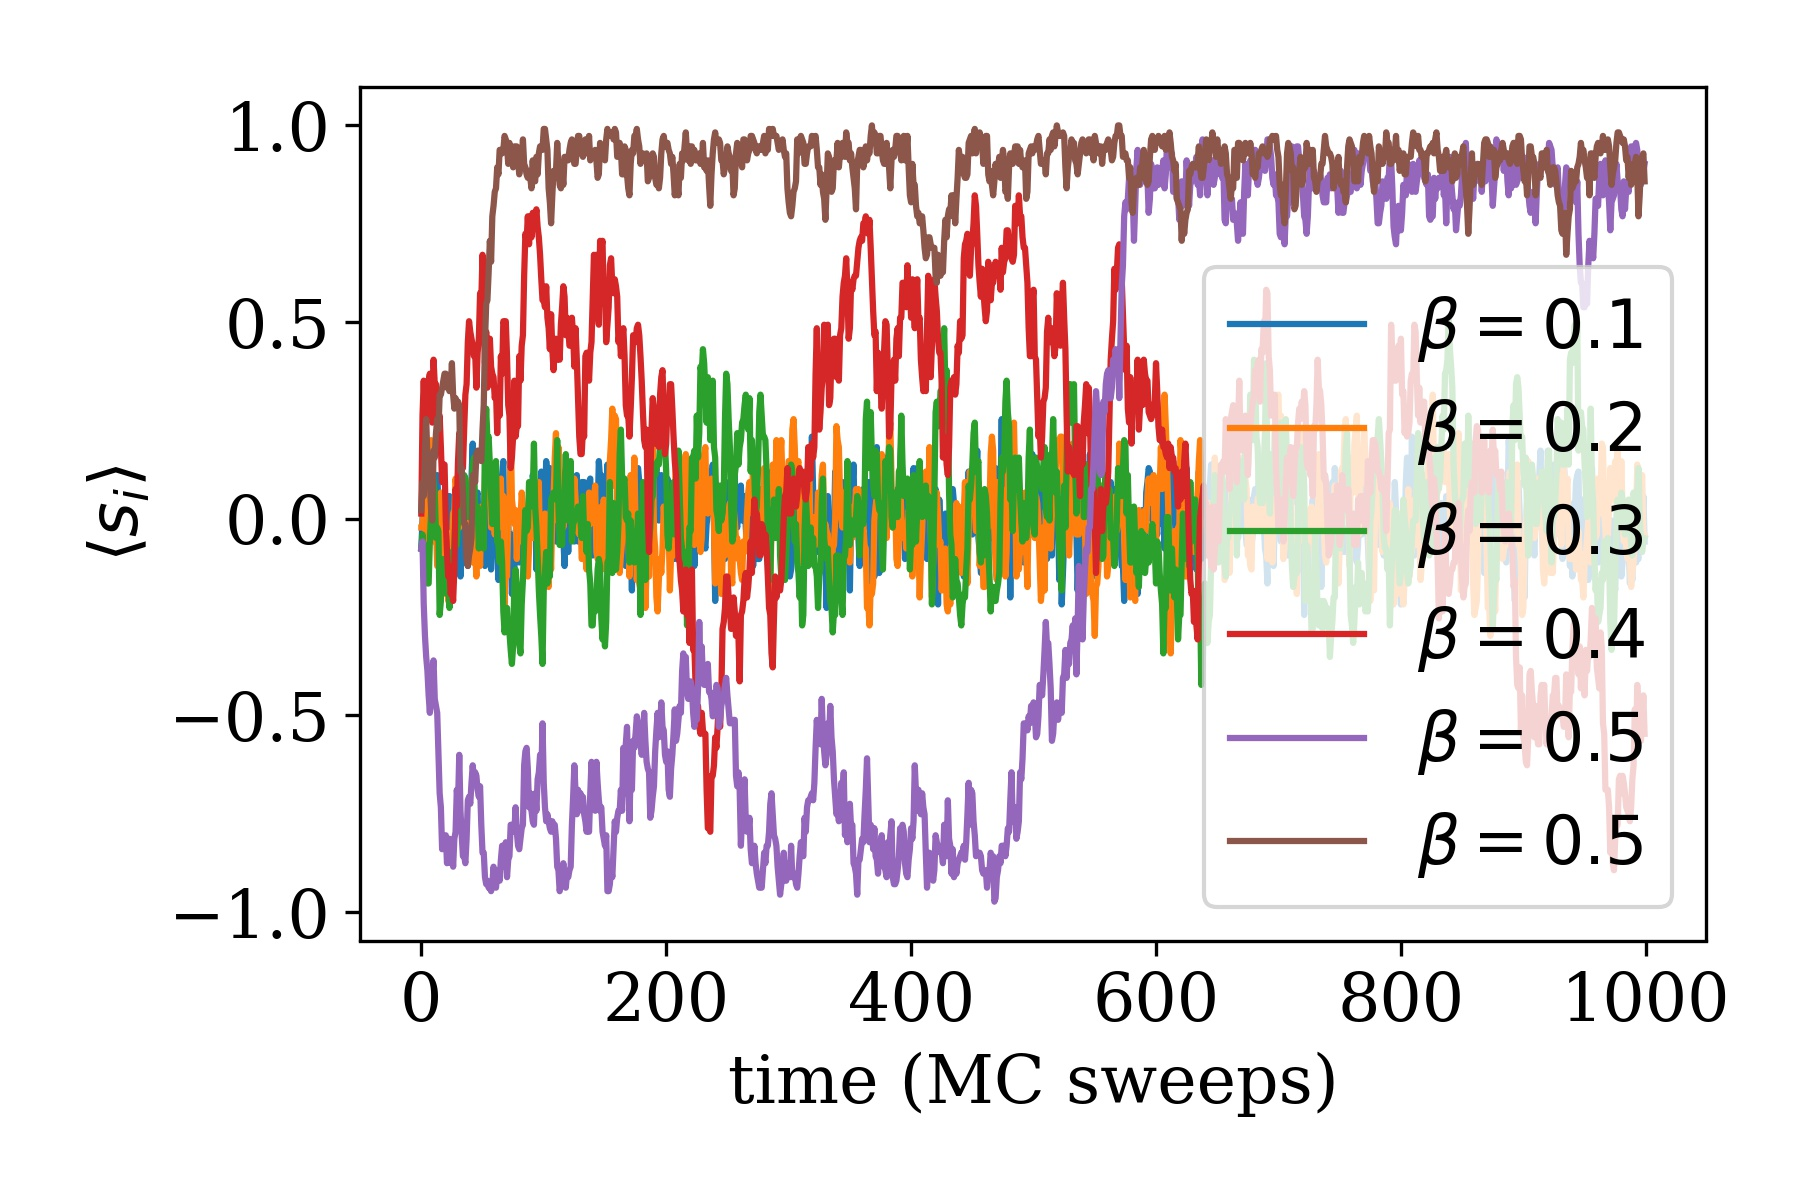

In [3]:
#EXAMPLE RESULT
Image(os.path.join(figure_dir,"m_vs_time.jpg"),width=400, height=400)

**Part 2c (20 points) **

Run 5 simulations at each chosen value of $\beta$ above and below the predicted transition temperature. For these simulations, first compute the mean of `average_spins` (throwing out pre-equilibration time), and then compute the standard deviation across the 5 copies, plot $\langle |m| \rangle_\mathrm{ensemble} $ vs $\beta$ with standard deviation as the errorbars (use the `plt.errorbar` function to make the plot). Compute the absolute value using `np.abs`.

*Note* A similar calculation will be done in the next 2 parts, so if you want to be efficient, you can read the next question and write this part as a function that returns results to be plotted. 

** Part 2d (20 points total) **

**Answer this question: (5 points)** What formula can you use to compute the specific heat-per-spin ($c$) from your simulations? You can compute it in units of $k_B$, which will make it so you don't have to choose a particular unit system.

Make a plot of $c$ vs $\beta$ from the same simulations as used in the previous part, using the formula/approach you just explained.

In [11]:
#Do part 2c here (see my result figures below)

** answer question in part 2d here **

In [12]:
#Do part 2d here (see my result figures below)

**Part 2e (15 points)**

In the previous part, you should find a transition close to the predicted critical point. But real phase transitions only happen in the thermodynamic limit. One consequence of this is that they get 'smoothed out' for small system sizes. 

Repeat the above calculation/plots of $m$ and $c$ vs $\beta$ for at least 2 other system sizes (one bigger and one smaller than $l=15$), to see how the transition changes with system size. 

In [ ]:
#do part 2e here

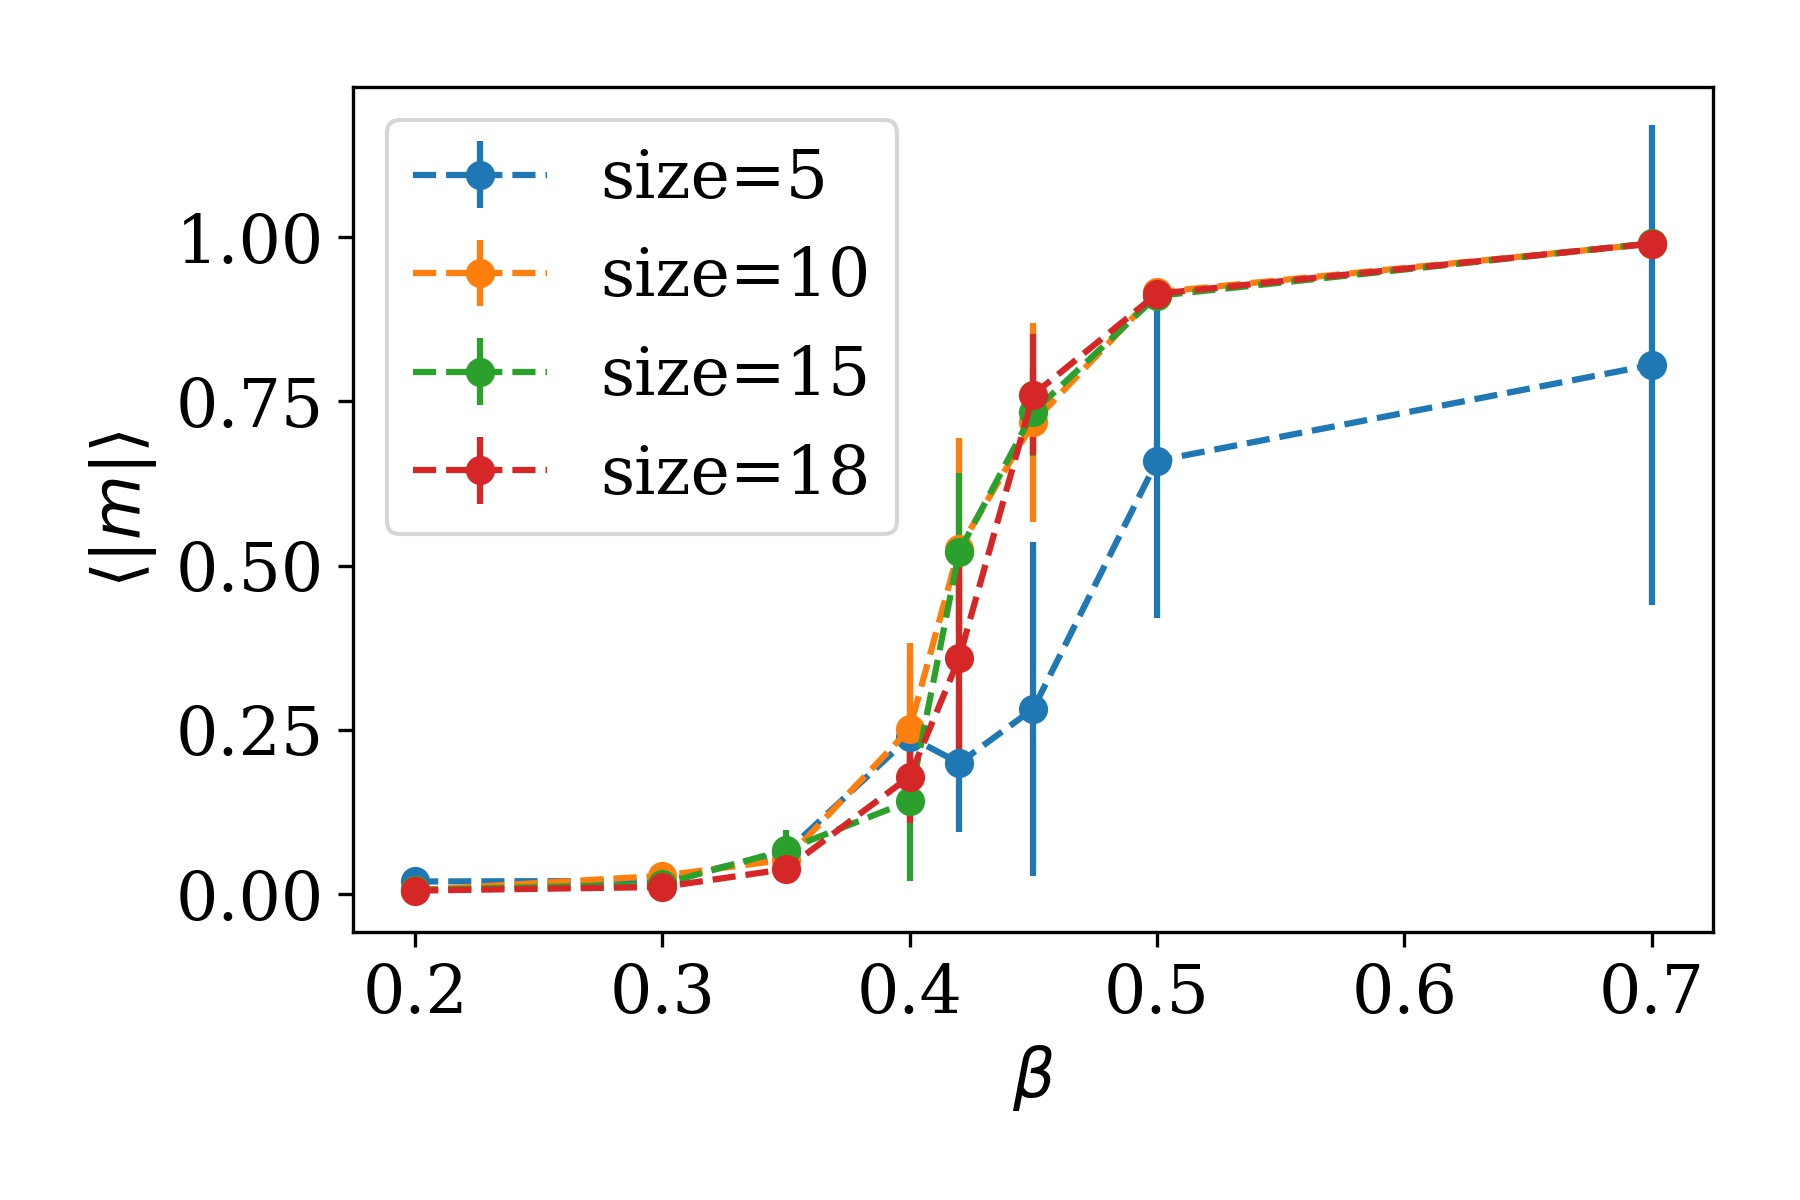

In [4]:
#my result for part 2e (note, yours may not match exactly because of randomness)
Image(os.path.join(figure_dir,"m_vs_beta_vs_size.jpg"),width=400, height=400)

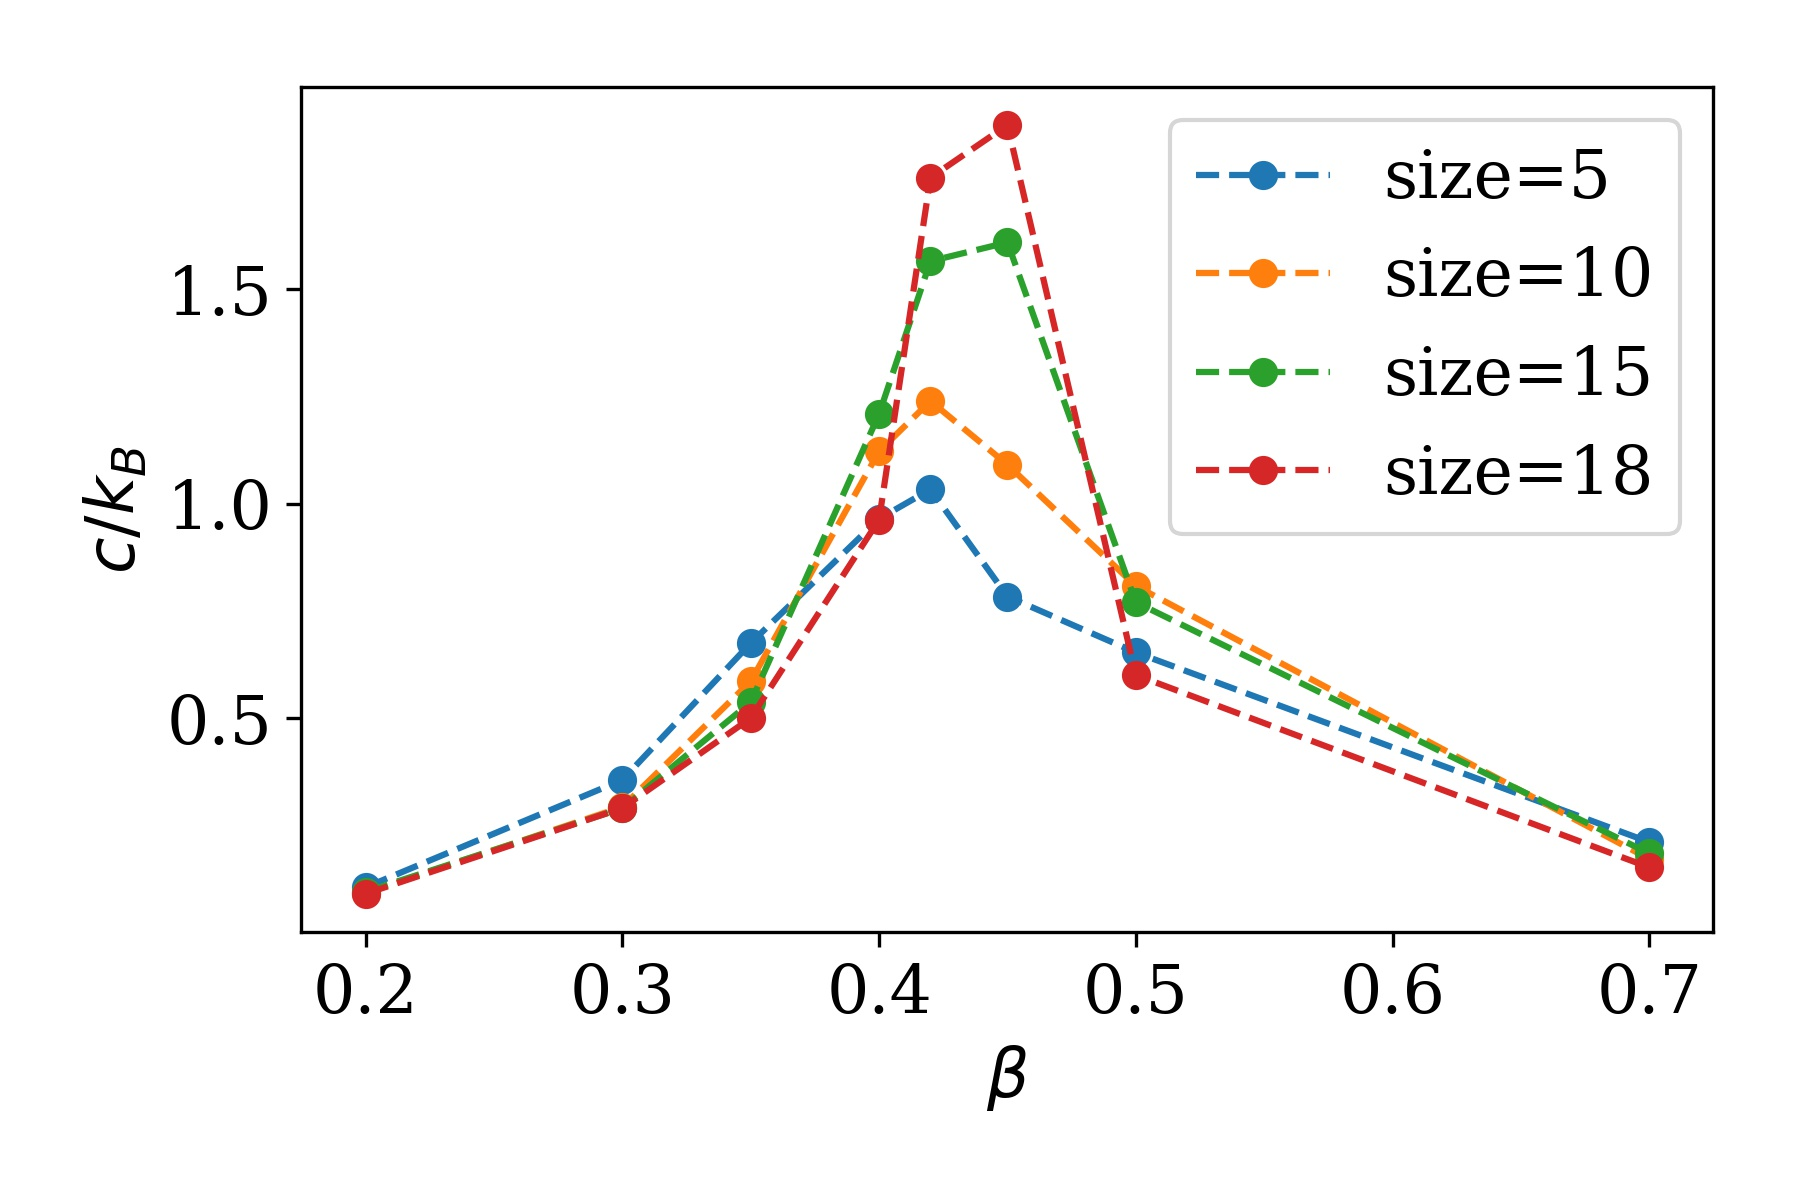

In [5]:
#my other result for part 2e
Image(os.path.join(figure_dir,"c_vs_beta_vs_size.jpg"),width=400, height=400)

### Part 3 (100 points total) ###
**Studying the finite-field Ising model using Umbrella Sampling**

We learned about Umbrella sampling in class as a way to compute a fast way to compute the potential-of-mean-force.

In this case, we want to compute the probability of seeing a particular value of $m$, including rare values of $m$, at a particular $J$ an $h$.

Let's do it for a fixed temperature, and scanning positive values of $h$, where we expect to have a first order phase transition.

**Part 3a (20 points)**

Compute and plot $m(t)=\langle s_i(t) \rangle$ (not absolute value) vs positive $h$ at **$\beta=0.3$** for a **10x10** lattice. 

Figure out at what $h$ the magnetization-per-spin is about 0.5.


In [ ]:
#do part 3a here

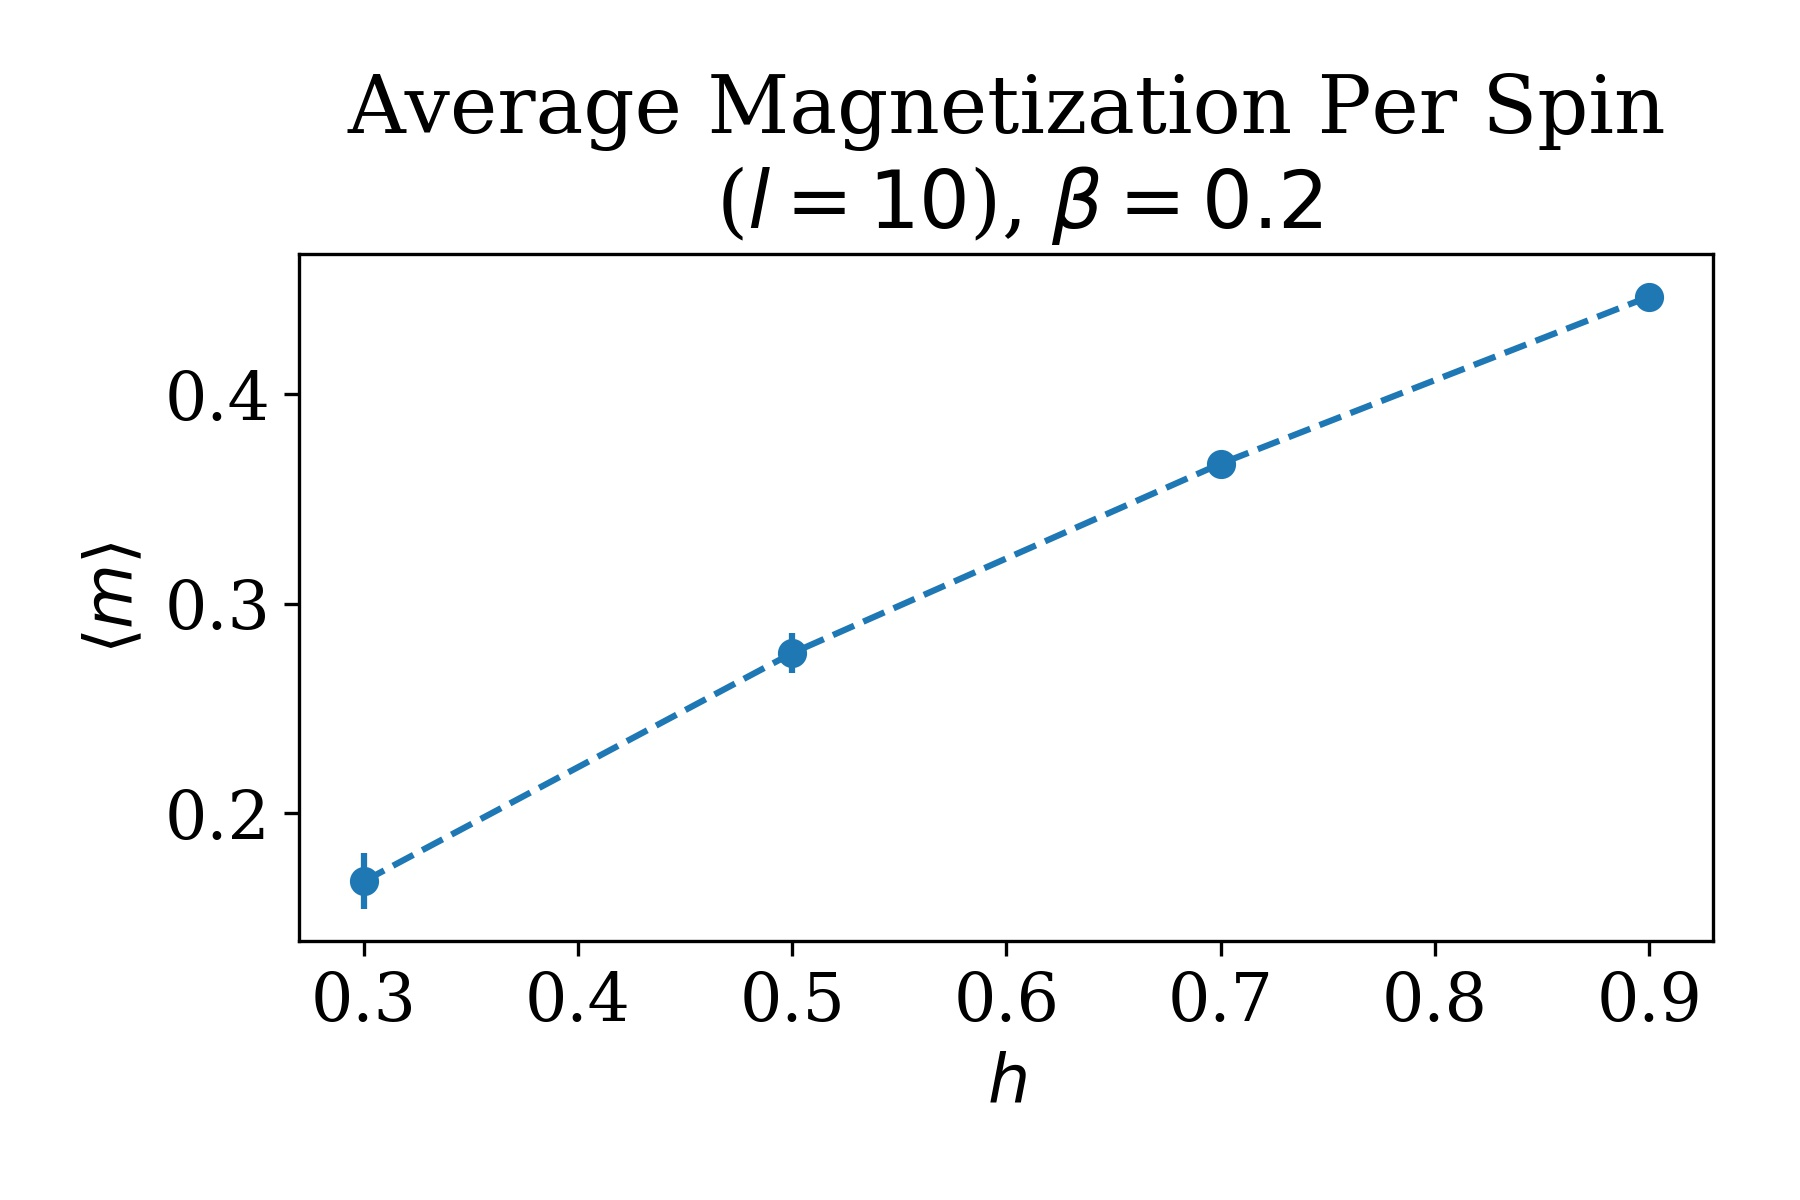

In [6]:
#an example result, for the wrong temperature, which I'll use below, yours will look different
Image(os.path.join(figure_dir,"m_vs_h_example.jpg"),width=400,height=400)

**Part 3b (40 points)**

Umbrella sampling. 

Write a new Monte-Carlo code to simulate the 'hard wall' version of Umbrella sampling we learned in class. The observable we wish to sample is $m$. 

In other words, do a regular simulation but give a particular configuration infinite energy if $m$ is not between $m_i-\delta$ to $m_i+\delta$. This will let you study rare fluctuations in $m$. For example, if we study the case of $\beta=0.3$ and $h$ where $\langle m \rangle=0.5$, it would be unlikely to see an average spin value of 0.1 However, by running many simulations with differnet $m_i$ going e.g. from 0 to 0.75, we can answer the question of how likely that spin value is. 

Hint: If the energy is infinite when you are outside the window, what happens to the metropolis critereon?

*Also: This time, check if you are within $\delta$ of $m_i$, and only save configurations (`configurations.append(configuration)`) if you are inside. All configurations inside the window are close to equilibrium samples, so you don't have to throw out part of the trajectory.*

(In this part, just fill in the Monte Carlo code by lightly changing what you had from the old code above, in the next cell, you can test if it's working. In the cell after, my code will do most of the actual umbrella sampling work). 

In [ ]:
#do part 3b here

In [ ]:
#Test whether umbrella sampling is working
test_energies,test_spins,test_cfgs = metropolis_mc_fast_umbrella(50,lattice_dimension=20,beta=0.2,J=1,h=0.9,m_i=0.5,delta=0.5)
#all avg spin values must be between 0.45 and 0.55
test_spin_array = np.array(test_spins)
test_array = (test_spin_array>0.45)*(test_spin_array<0.55)
if np.all(test_spins):
    print("Your code seems to be working!")
else:
    print("Your code doesn't seem to be working. Make sure you're only saving configs when you're in the restrained window, \
          and carefully check your metropolis critereon")

In [ ]:
delta = 0.05
m_i_list = np.arange(0.2,0.8+delta*2,delta*2)
h_val = 0.9
beta = 0.2
n_copies = 5
lattice_dimension = 20

initial_configuration = None
all_average_spins = []
for m_i in m_i_list:
    average_spins_m_i = []
    for j in range(n_copies):
        energies, average_spins, configurations = metropolis_mc_fast_umbrella(500, lattice_dimension, beta=beta, \
                                                                              J=1, h=h_val, m_i=m_i, delta=delta, \
                                                                              initial_configuration = initial_configuration)
        average_spins_m_i.extend(average_spins[100:])
        #average_spins_m_i.extend(average_spins)

        initial_configuration = configurations[-1]
    all_average_spins.append(average_spins_m_i)


In [ ]:
def bin_centers(bins):
    return (bins[:-1]+bins[1:])/2.0

all_bins = np.arange(0,1,delta/5.)
pmf_list = []
bin_centers_list = []
for average_spins in all_average_spins:
    hist,bins = np.histogram(average_spins,bins=all_bins,density=True)
    select = np.nonzero(hist)
    pmf = -np.log(hist[select])/beta    
    pmf_list.append( pmf )
    bin_centers_list.append( bin_centers(all_bins)[select] )
    plt.plot(bin_centers(all_bins),hist,marker='o')
plt.xlabel('$m$')
plt.ylabel('$P_i(m)$')

In [ ]:
for i in range(len(pmf_list)):
    plot(bin_centers_list[i],pmf_list[i],marker='o')
plt.ylabel('$-\log(P_i(m))/\\beta$')
plt.xlabel('$m$')

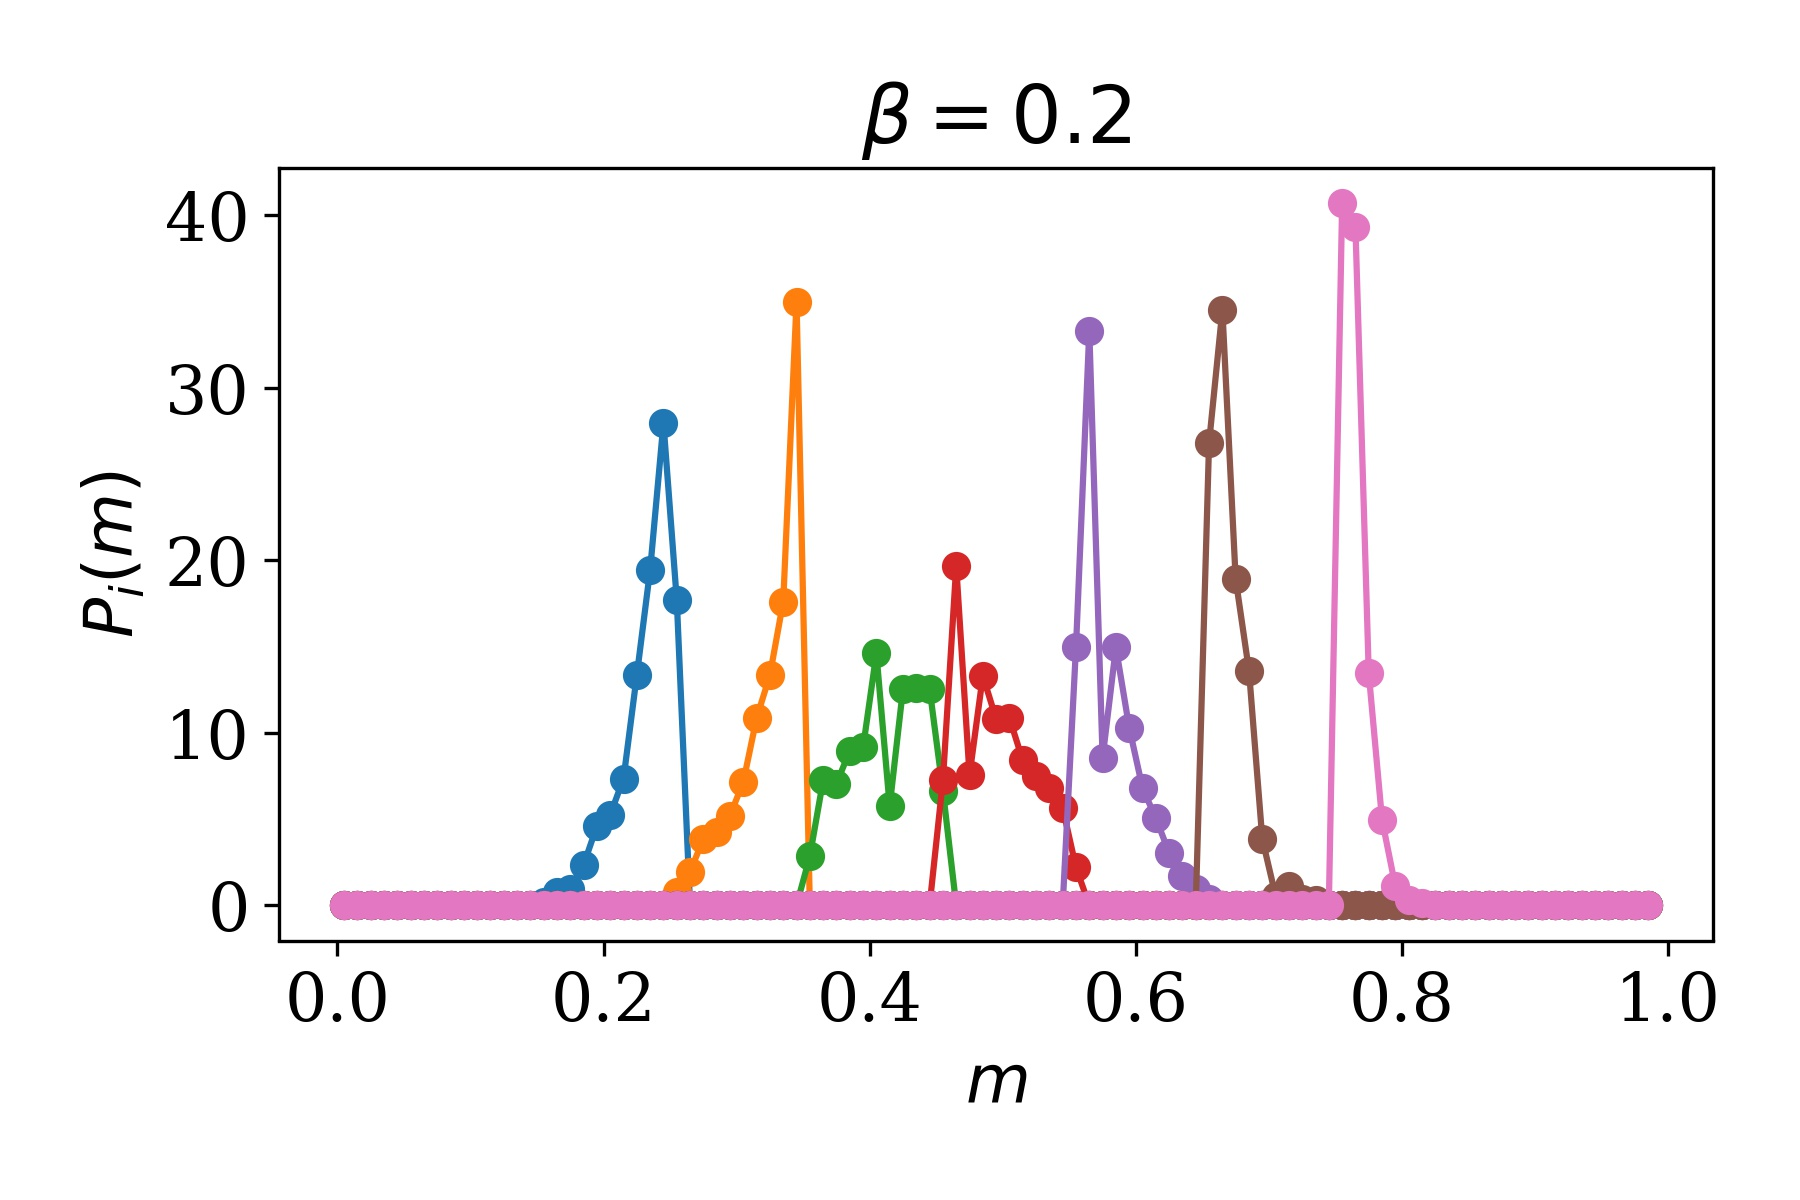

In [7]:
#my example result for 
Image(os.path.join(figure_dir,"umbrella_histograms.jpg"),width=400, height=400)

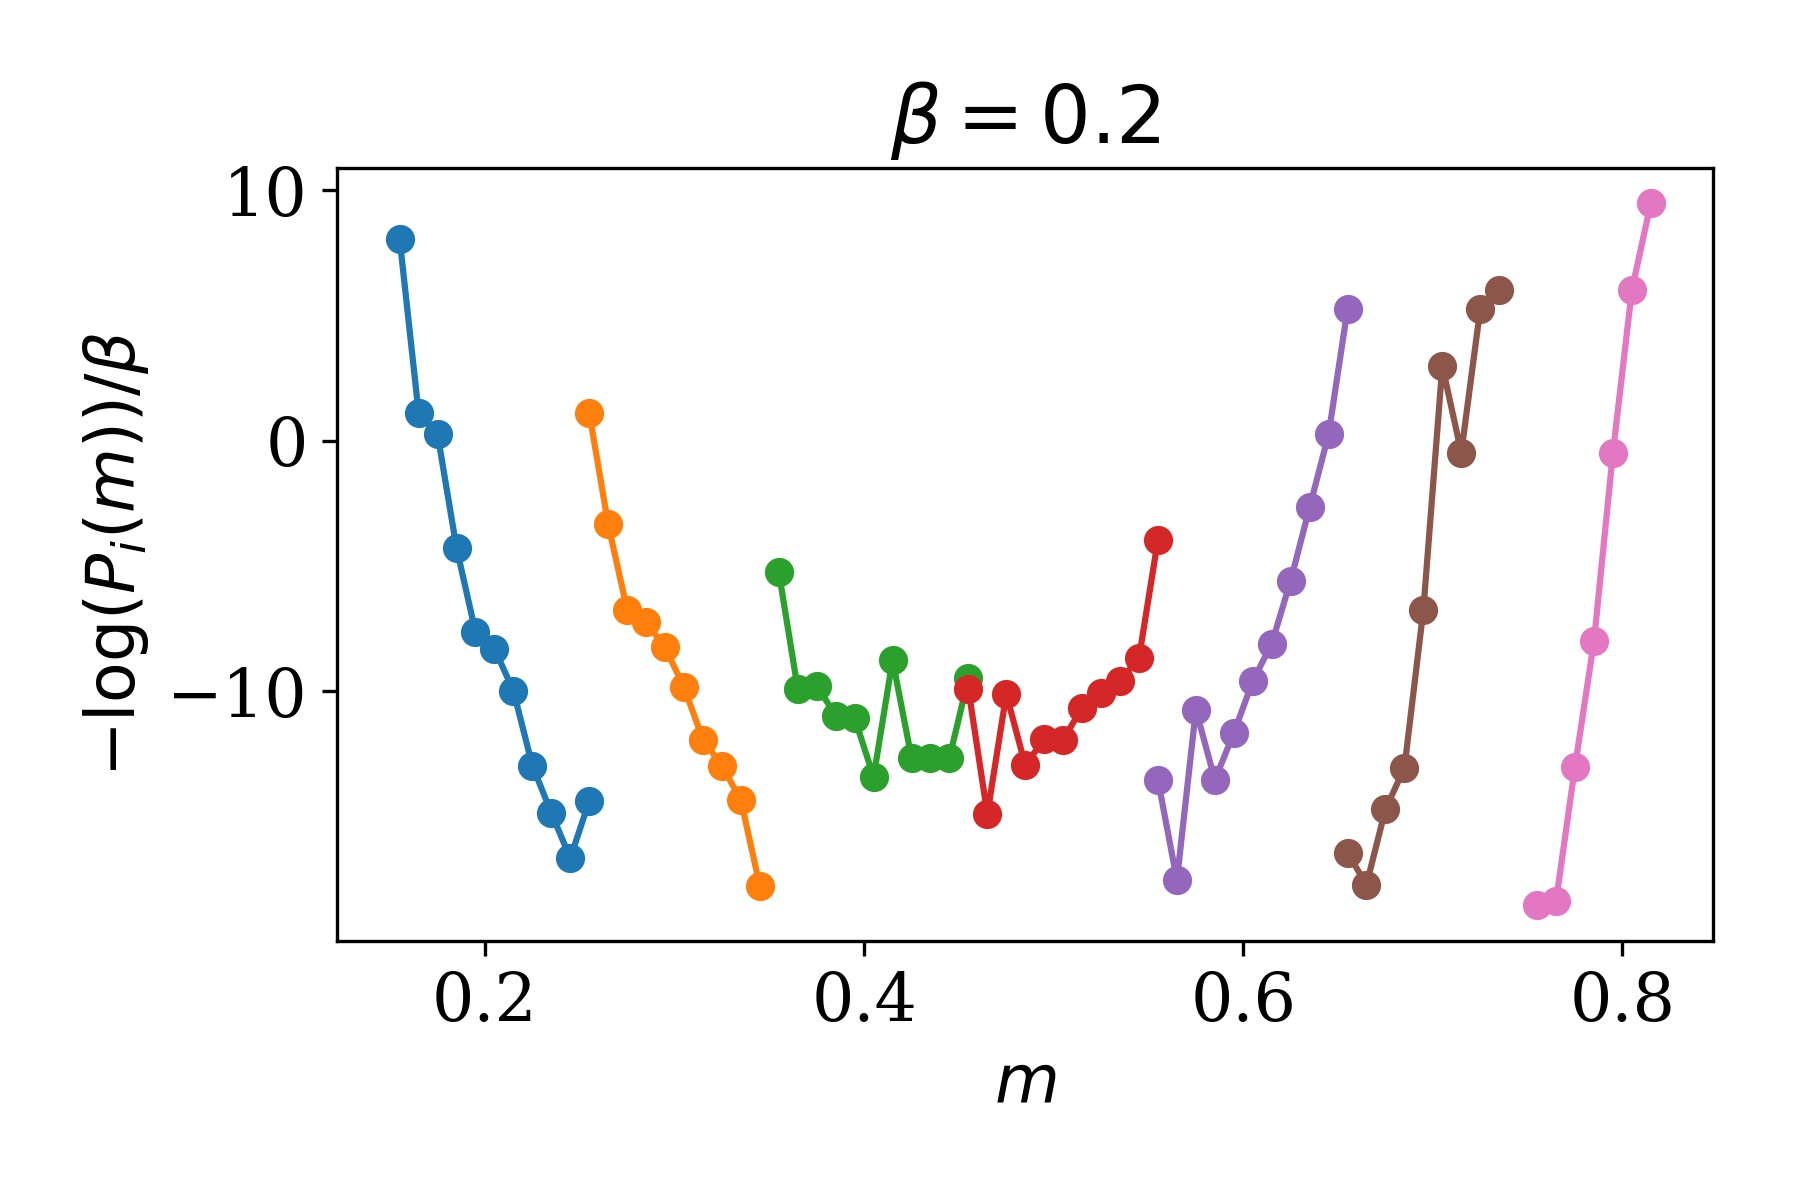

In [8]:
Image(os.path.join(figure_dir,"umbrella_partial_pmfs.jpg"),width=400, height=400)

**Part 3c (40 points total)**

Write a code that shifts the individual potential-of-mean-force curves from the preceeding plot and produces a pasted-together PMF, $F(m)$ as a function of magnetization. Plot $F(m)$ vs $m$ and $e^{-\beta F(m)}$ vs $m$. 

*Answer this question:* $e^{-\beta F(m)}$ is proportional to the probability of seeing a given value of $m$. Explain what you have to do to get $P(m)$ from this (or, type the formula).

**Answer the question in part 3c here**

In [ ]:
#Do part 3c here

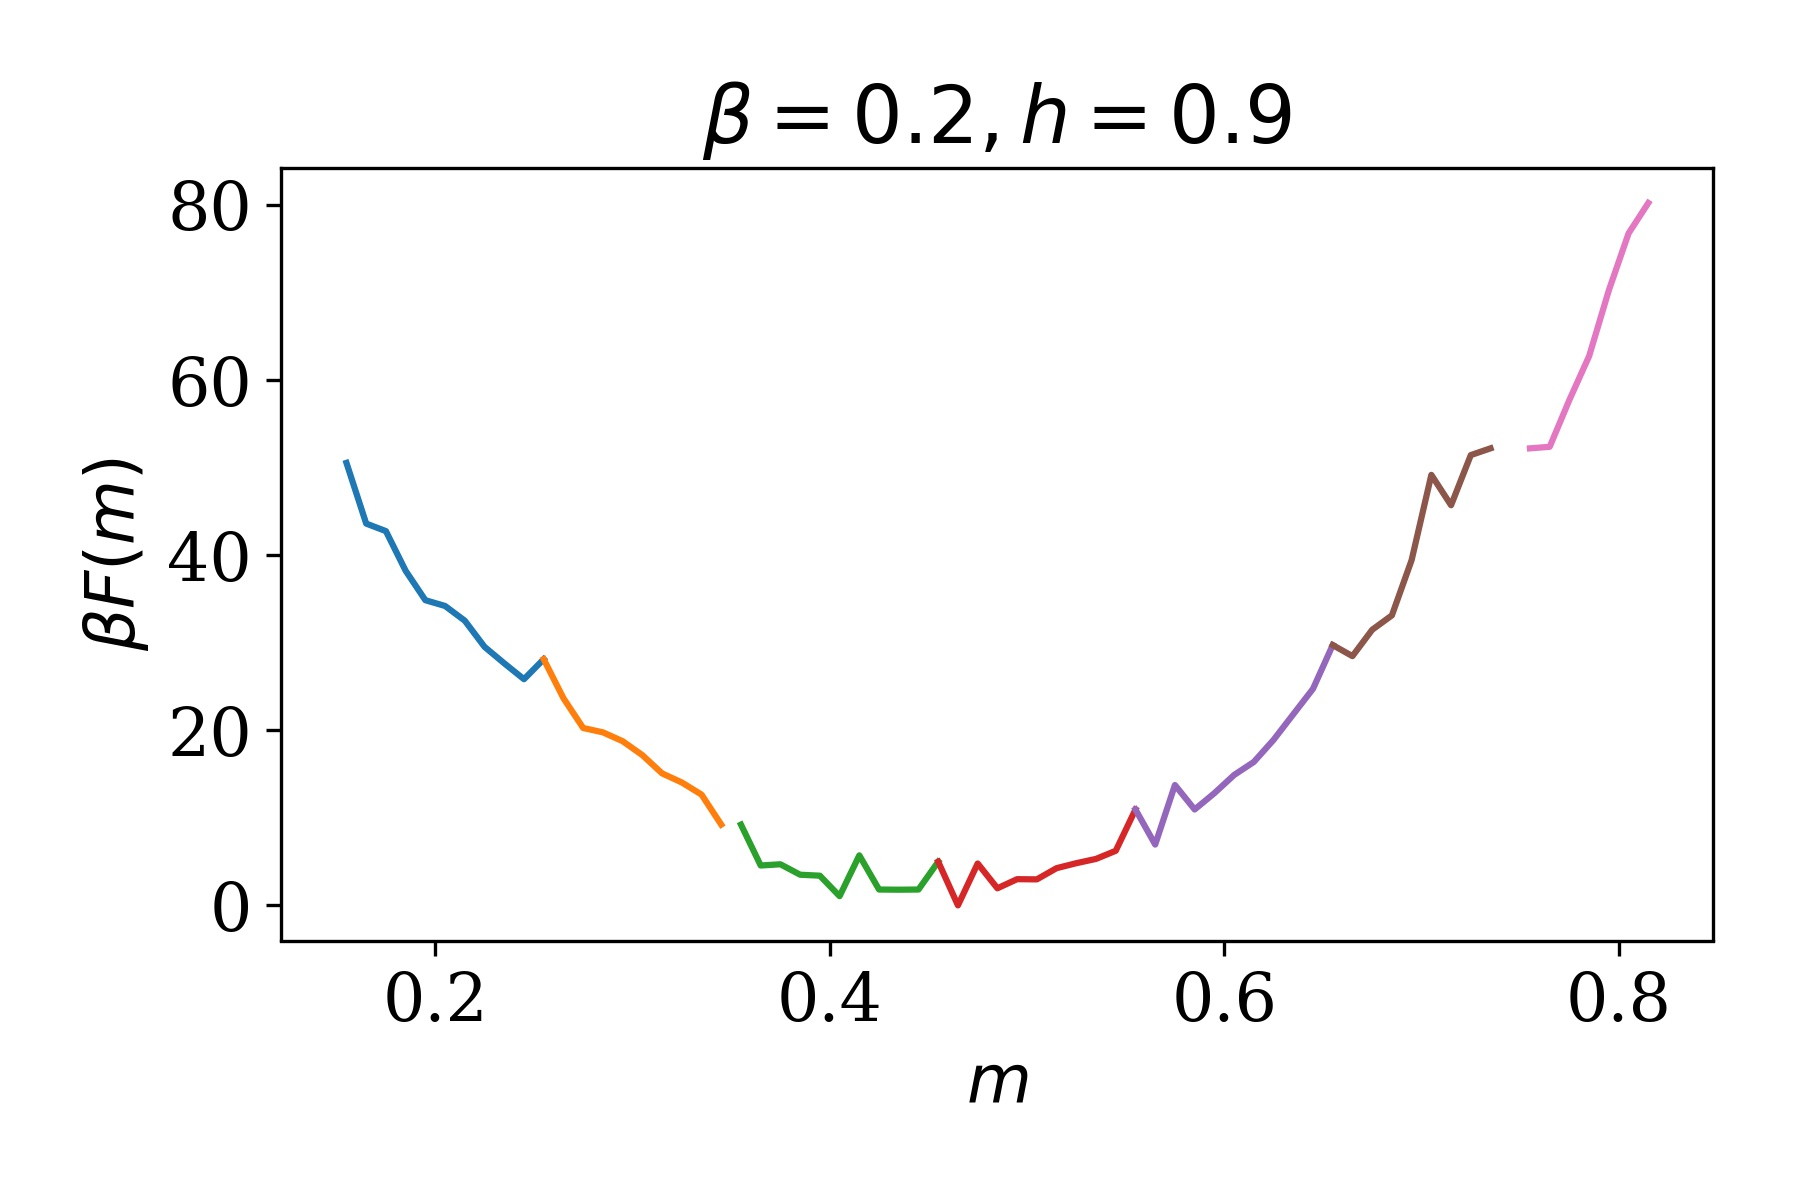

In [9]:
#an example result
Image(os.path.join(figure_dir,"beta_F.jpg"),width=400, height=400)

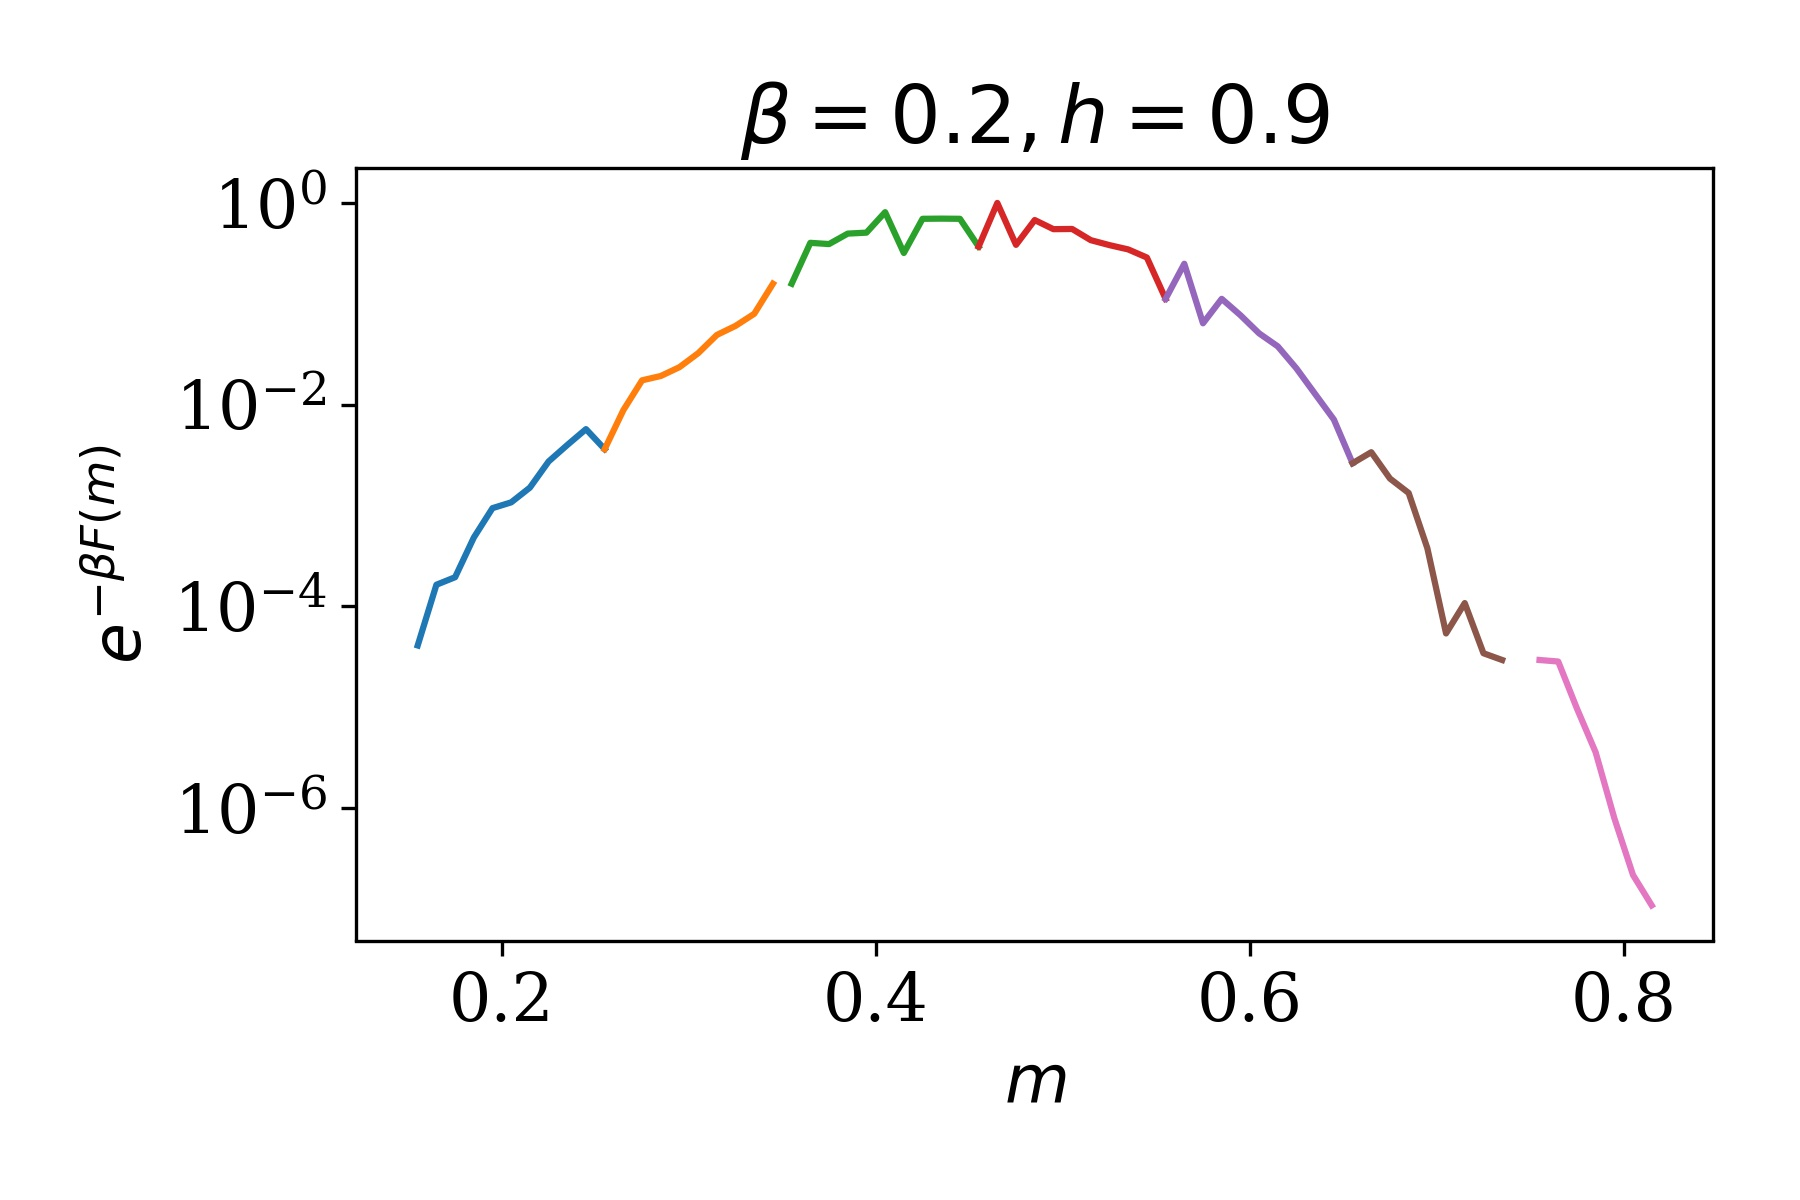

In [10]:
#an example result
Image(os.path.join(figure_dir,"exp_minus_beta_F.jpg"),width=400, height=400)